# A Quantum Algorithm for a Classical Spin Model
## Abstract
We will present an efficient quantum algorithms to estimate the partition function $\mathcal{Z}$ of the classical Ising model. The proof of this result is based on a mapping from partition functions to quantum states and to quantum circuits.
## 2D Ising model with fields
We will consider a 2-dimensional classical Ising model with a square lattice. This model can be described as an edge model where we associate a spin variable $s_i\in\{0,1\}$ to each vertex $i$ of the lattice, let $\vec{s}$ denote the set of all the spin variables. The spin-spin interaction is a 2-body interaction $h_e(s_i,s_j)=-J_e \delta(s_i+s_j)$ and it is associated to each edge $e=(i,j)$ of the lattice. The sum $s_i+s_j$ is modulo 2, and $\delta(0)=1$, $\delta(1)=0$. We will also consider an external magnetic field $h_i(s_i)=-h_i\delta(s_i)$ at each site $i$ of the lattice. The full Hamiltonian of the system is
$$H(\vec{s}) = -\sum_{e=(i,j)}J_e \delta(s_i+s_j) - \sum_i h_i\delta(s_i).$$
Let $\beta$ denote the inverse of the temperature. Given these interactions, the corresponding Boltzmann factors are
$$w_e(s_i,s_j)=e^{-\beta h_e(s_i,s_j)},$$
for the spin-spin interaction, whereas for the spin-magnetic field interaction we have
$$w_i(s_i)=e^{-\beta h_i(s_i)}.$$
## Lattice-Circuit map
Building up our map between the classical lattice and the quantum circuit we associate to each horizontal edge $e$ the operator 
$$W_e^h=\sum_{s_i,s_j}w_e(s_i,s_j)\ket{s_j}\bra{s_i},$$
to each vertical edge $e$ the operator
$$W_e^v=\sum_{s_i,s_j}w_e(s_i,s_j)\ket{s_is_j}\bra{s_is_j},$$
and to each site $i$ the operator
$$W_i=\sum_{s_i}w_i(s_i)\ket{s_i}\bra{s_i}.$$
In this way we have defined the following operators
$$W_e^h = \begin{bmatrix} e^{\beta J_e} & 1\\ 1 & e^{\beta J_e} \end{bmatrix},$$
$$W_e^v = \begin{bmatrix} e^{\beta J_e} & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & e^{\beta J_e} \end{bmatrix},$$
$$W_i=\begin{bmatrix} e^{\beta h_i} & 0 \\ 0 & 1 \end{bmatrix}.$$
Note that these operators, to be unitary, they need complex coupling strengths $h_i$ and $J_e$.
## Quantum Circuit
Now we will construct explictly a quantum circuit to compute the partition function of an Ising model with a particular choice of the coupling constants. We will use Qiskit.


In [1025]:
# some useful imports
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector
import math
import cmath
import numpy as np

In this program we will focus on a 2-dimensional classical Ising model with a square lattice of size $n$ (which represents the number of sites both in the vertical and in the horizontal direction). Let $\tau$ denotes the number of horizontal edges in the lattice.

In [1026]:
# dimension n of the circuit/lattice
n = 5
# number of horizontal edges
tau = n*(n-1)

On each site $i$ of the lattice a constant complex magnetic field $h_i$ is present satisfying:
$$e^{\beta h_i} = e^{i\pi/4}.$$
In the map linking the lattice to a quantum circuit we can associate to this interaction the single-qubit gate $V$ ($W_i$) such that
$$V=\begin{bmatrix} e^{i\pi/4} & 0 \\ 0 & 1 \end{bmatrix}.$$
This operator is implemented by $V=XTX$, where $X$ is the x-Pauli matix and $T$ the phase gate $P(\lambda)$ with $\lambda=i\pi/4$.



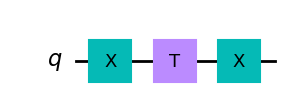

In [1028]:
# creation of the operator V (spin-magnetic field interaction) (1-qubit operator)
# circuit of V
V_circ = QuantumCircuit(1, name = 'V')
V_circ.x(0)
V_circ.t(0)
V_circ.x(0)
# V operator
V_op = Operator(V_circ)

V_circ.draw('mpl')

The edges of the lattice are associated to spin-spin interactions. We will assume that on each edge $e$ a constant complex coupling $J_e$ is present satisfying:
$$e^{\beta J_e} = i.$$
In the map linking the lattice to a quantum circuit we can associate to this interaction two kind of quantum gates. The first one, let call it $W_h$, reproduces the interaction of the horizontal edges and can be represented by the following single-qubit non diagonal operator:
$$W_h = \begin{bmatrix} i & 1\\ 1 & i \end{bmatrix}.$$
Note that this operator is not unitary, but the problem can be easily fixed considering $\bar{W}_h=W_h/\sqrt{2}$. The missing factor $\sqrt{2}$ will be taken in consideration at the end.\
Recall that a single qubit rotation gate with three Euler angles $U(\theta,\phi,\lambda)$ can be written as
$$U(\theta,\phi,\lambda) = 
\begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2)\end{bmatrix},$$
then $\bar{W}_h=U(\pi/2,-\pi/2,\pi/2)$.

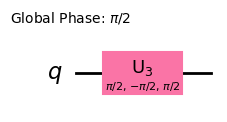

In [1029]:
# creation opf the operator W_h (horizontal spin-spin interaction) (1-qubit gate)
W_h = qi.Operator([[math.sqrt(2)*0.5j, math.sqrt(2)*0.5],
                   [math.sqrt(2)*0.5, math.sqrt(2)*0.5j]])
W_h_circ = QuantumCircuit(1)
W_h_circ.unitary(W_h, 0)
W_h_circ.decompose().draw("mpl")

The spin-spin interaction in the vertical edges can be represented by the quantum gate $W_v$, a two-qubit diagonal operator defined as:
$$W_v = \begin{bmatrix} i & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & i \end{bmatrix}.$$
It is possible to see that it can be written as
$$W_v = \mathbb{I}\otimes U(\pi/2,-\pi,-\pi/4)\cdot C_0NOT_1 \cdot S \otimes U(\pi/2,3\pi/4,0),$$
where $S=P(\pi/2)$.


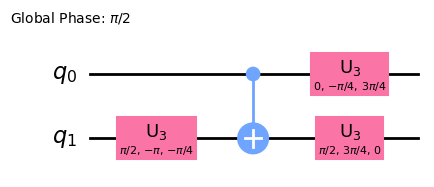

In [1030]:
# creation of the operator W_v (vertical spin-spin interaction) (2-qubit gate)
W_v = qi.Operator([[1j, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1j]])
W_v_circ = QuantumCircuit(2)
W_v_circ.unitary(W_v, [0,1])
W_v_circ.decompose().draw("mpl")

We can compute the partition function $\mathcal{Z}$ of this lattice with these complex coupling strenghts using a quantum cicuit $\mathcal{C}$. For each site of the lattice we insert a unitary gate $V$ in the quantum circuit, for every horizontal edge in the lattice we insert a unitary gate $\bar{W}_h$ in the quantum circuit and for every vertical edge in the lattice we insert a unitary gate $W_v$ in the quantum circuit. In this way
$$\bar{\mathcal{C}}=\prod V \bar{W}_v W_h.$$
The relation between $\mathcal{C}$ and $\bar{\mathcal{C}}$ is simply given by $\bar{\mathcal{C}} = \mathcal{C}/2^{\tau/2}$.

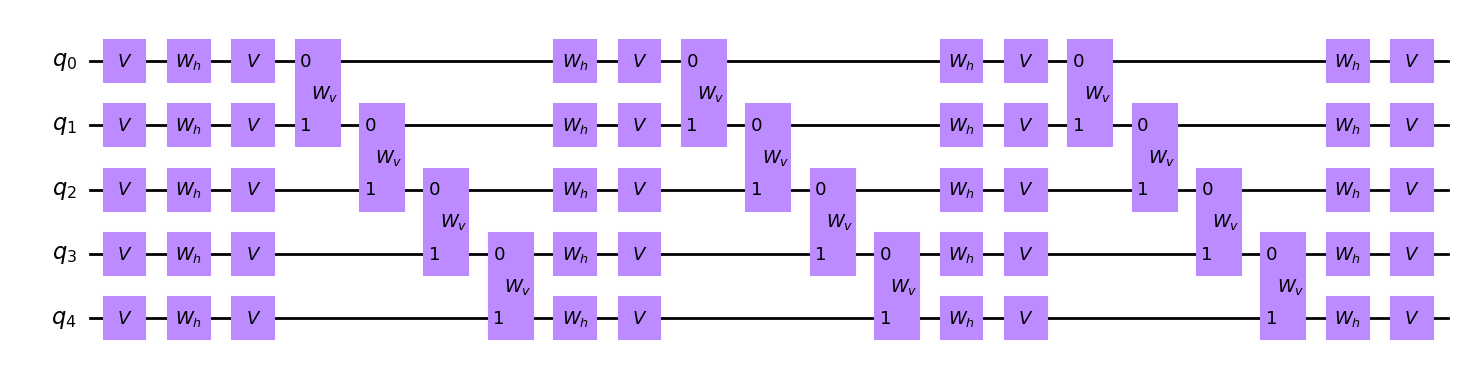

In [1031]:
# creation of the quantum circuit
qc = QuantumCircuit(n)
# apply the first layer of operator V
for i in range(n):
    qc.unitary(V_op, i, label = '$V$')
qc.barrier(range(n))
# apply (n-2) layers of W_h, V and W_v operators
for i in range(n-2):
    for j in range(n):
        qc.unitary(W_h, j, label = '$W_h$')
        qc.unitary(V_op, j, label = '$V$')
    for j in range (n-1):
        qc.unitary(W_v, [j,j+1], label = '$W_v$')
    qc.barrier(range(n))
# apply the last layer of W_h and V
for i in range(n):
    qc.unitary(W_h, i, label = '$W_h$')
    qc.unitary(V_op, i, label = '$V$')
qc.draw('mpl', plot_barriers=False)

For the computation of the partition function $\mathcal{Z}$ the boundary conditions play a critical role. We will consider three possibilities: fixed left (L) and right (R) boundary conditions, open boundary conditions (OBC) and periodic boundary conditions.\
So we should define the operators that creates these boundary states starting from the ground state. We also define the circuit-operator to make the states evolve. 

In [1032]:
# operator to initialize the state for L boundary conditions (the ground state)
l_circ = QuantumCircuit(n)
for i in range(n):
    l_circ.x(i)
l_op = Operator(l_circ)
# operator to initialize the state for R boundary conditions (the ground state)
r_circ = QuantumCircuit(n)
for i in range(n):
    r_circ.x(i)
r_op = Operator(r_circ)
# operator to inizialize the state for OBC
obc_circ = QuantumCircuit(n)
for i in range(n):
    obc_circ.h(i)
obc_op = Operator(obc_circ)
# operator to let the state evolves
qc_op = Operator(qc)

The ground state $\ket{0}^{\otimes n}$ can be easily obtained initializing each qubit to the zero state, from it we can derive the states for each boundary conditions. In particular in the case of L, R boundary conditions we have $\ket{L}$, $\ket{R}$, that we choose to put equal to $\ket{1}^{\otimes n}$; while for the open boundary conditions we have the state $\ket{+}^{\otimes n}$, where $\ket{+}$ is defined as 
$$\ket{+}=\frac{\ket{0}+\ket{1}}{\sqrt{2}}.$$

In [1033]:
# creation of the ground state
gs = Statevector.from_int(0,2**n)
# creation of the states for L, R boundary conditions
l_state = gs.evolve(l_op)
r_state = gs.evolve(r_op)
# creation of the initial state for OBC
obc_state = gs.evolve(obc_op)

Acting with the circuit $\bar{\mathcal{C}}$ on the states $\ket{R}$ (L, R boundary conditions) and $\ket{+}^{\otimes n}$ (OBC) we obtain the time evolution of these states.

In [1034]:
# creation of the final state for L, R boundary conditions
r_evolved = r_state.evolve(qc_op)
# creation of the final state for OBC
obc_evolved = obc_state.evolve(qc_op)

The partition function $\mathcal{Z}_{\text{L,R}}$ with left (L) and right (R) boundary conditions, can be computed by
$$\mathcal{Z}_{\text{L,R}} = 2^{\tau/2} \bra{L} \bar{\mathcal{C}}\ket{R}.$$

In [1035]:
# partition function for L, R boundary conditions
Z_lr = l_state.inner(r_evolved) * pow(2, tau/2)
print(f'Z_lr ={Z_lr:10.5f}')

Z_lr =-325.58788-168.00000j


In [1036]:
# partition function for OBC computed classicaly for a n-sized lattice
if n >= 5:
    print('For a lattice size n>4 it takes too long, sorry.')
else:
    # partition function computed classicaly
    Z_cl = 0+0j
    # number of independent spins
    n_ind = n*n 
    # spin configuration vector
    spins = np.zeros(shape=(n_ind))
    # useful converter of string to list of integers
    def Convert(string):
        list1 = []
        list1[:0] = string
        list2 = [int(a) for a in list1]
        return list2
    # delta function
    def delta(a):
        if a == 0 or a==2:
            return 1
        else:
            return 0
    # sum over all possible spin configurations
    for s in range(pow(2,n_ind)):
        # initialize a new spin configuration s
        spins = Convert(np.binary_repr(s,n_ind))
        # Boltzmann factor for the spin configuration s
        Z_s = 1
        # product of all the Boltzmann factors h_e and h_i
        for r in range(n):
            for c in range(n):
                # vertex of the lattice in the row r and column c
                v = n*r+c
                # magnetic field interaction contribution
                Z_s = Z_s * cmath.exp(math.pi * 0.25j * (1-spins[v]))
                # spin-spin interaction contribution
                if c != n-1:
                    # horizontal direction
                    Z_s = Z_s * cmath.exp(math.pi * 0.5j * delta(spins[v]+spins[v+1]))
                    if r != n-1 and c != 0:
                        # vertical direction
                        Z_s = Z_s * cmath.exp(math.pi * 0.5j * delta(spins[v]+spins[v+n]))
        Z_cl = Z_cl + Z_s
    print(f'Classical computation of the partition function for OBC\nZ_obc ={Z_cl:10.5f}')  

Classical computation of the partition function for OBC
Z_obc =-17930.10562+4871.76450j


The partition function $\mathcal{Z}_{\text{OBC}}$ with open boundary conditions (OBC), can be computed by
$$\mathcal{Z}_{\text{OBC}} = 2^{\tau/2+n} \bra{+}^{\otimes n} \bar{\mathcal{C}}\ket{+}^{\otimes n}.$$

In [1037]:
# partition function for OBC
Z_obc = obc_state.inner(obc_evolved) * pow(2, n+tau/2)
print(f'Z_obc ={Z_obc:10.5f}')

Z_obc =-17930.10562+4871.76450j


The partition function $\mathcal{Z}_{\text{PBC}}$ with periodic boundary conditions (PBC), can be computed as the trace of the circuit $\mathcal{C}$ such that 
$$\mathcal{Z}_{\text{PBC}} = 2^{\tau/2}\text{Tr}(\bar{\mathcal{C}})$$

In [1038]:
# partition fanction for PBC
Z_pbc = np.trace(qc_op.data) * pow(2, tau/2)
print(f'Z_pbc = {Z_pbc:10.5f}')


Z_pbc = -2389.40952+833.33218j


## Swap Test
Now we will use the swap test quantum circuit to estimate the partition function $\mathcal{Z}_{L,R}$. This circuit allows us to estimate the modulus of the scalar product between two arbitrary states by measuring the probility $p_0$ of getting 0 on an ancilla qubit.\
In the swap test quantum circuit there are three input states, the first one is an ancilla qubit initialize to $\ket{0}$, the second one is the state $\bar{\mathcal{C}}\ket{R}$ represented by $n$ qubits, and the third one is the state $\ket{L}$ represented by $n$ qubits. We have to apply an Hadamard gate to the first qubit, a controlled swap between the other two states, and then an Hadamard to the first qubit. Measuring the ancilla qubit and the frequency with which it is found in the state $\ket{0}$, we are able to estimate the modulus square of the scalar product between the states $\bar{\mathcal{C}}\ket{R}$ and $\ket{L}$, strictly related to $|\mathcal{Z}_{L,R}|^2$. Indeed we have
$$|\mathcal{Z}_{L,R}|^2 = 2^{\tau}(2p_0-1).$$


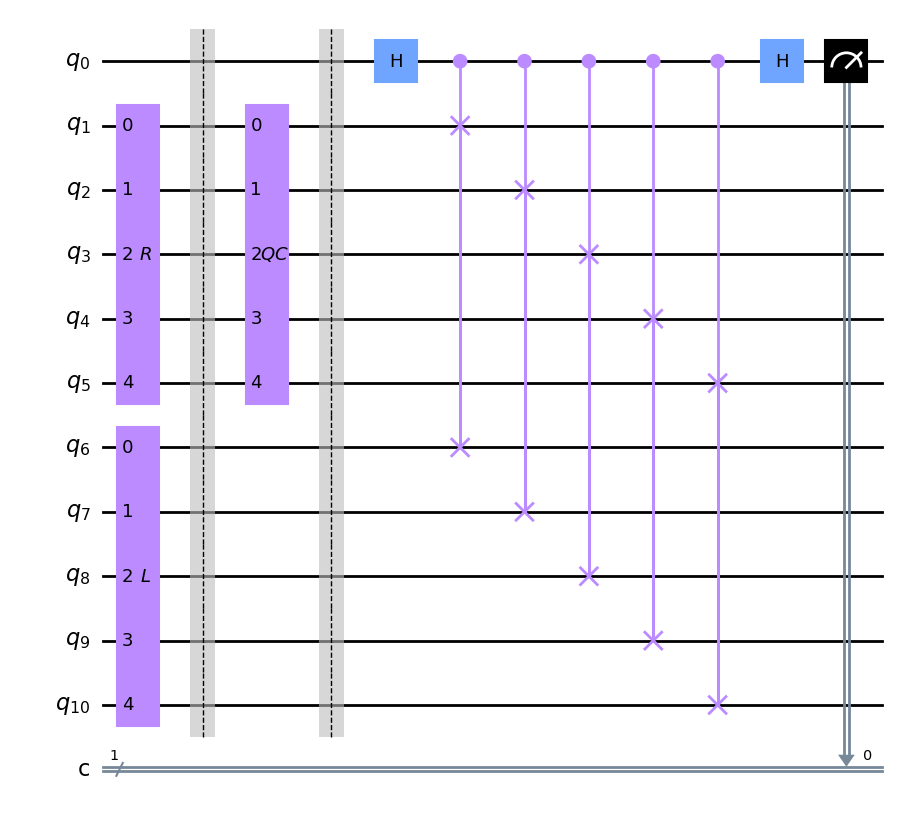

In [1039]:
# definition of the swap test circuit
swap_test = QuantumCircuit(2*n+1,1)
# add the gate that prepares the state |R>
swap_test.unitary(r_op, range(1,n+1), label = '$R$')
# add the gate that prepares the state |L>
swap_test.unitary(l_op, range(n+1,2*n+1), label = '$L$')
swap_test.barrier(range(2*n+1))
# add the gate that evolves the state |R> 
swap_test.unitary(qc_op, range(1,n+1), label = '$QC$')
swap_test.barrier(range(2*n+1))
# add the swap test circuit
swap_test.h(0)
for i in range(1,n+1):
    swap_test.cswap(0,i,i+n)
swap_test.h(0)
# measurement
swap_test.measure(0,0)
swap_test.draw('mpl')


In [1040]:
# useful import for the simulation and the visualization of the results
from qiskit.providers.aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

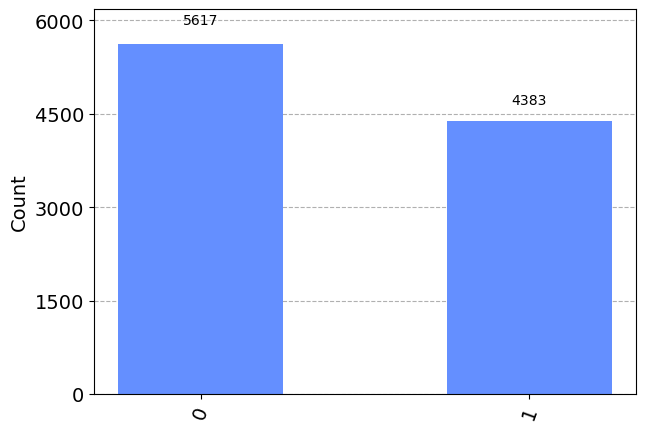

In [1041]:
# simulation
N_shots = 10000
simulator = AerSimulator()
compiled_circuit = transpile(swap_test, simulator) 
job = simulator.run(compiled_circuit, shots = N_shots) 
result = job.result()
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)

In [1042]:
# modulus of Z_lr (exact value)
mod_Z = abs(Z_lr)
print(f'|Z_lr| = {mod_Z:10.5f}')

|Z_lr| =  366.37613


In [1043]:
# estimate of Z_lr
p0 = counts['0'] / N_shots
Z_es = pow(2,tau/2) * math.sqrt(2*p0-1)
print(f'estimate of |Z_lr| = {Z_es:10.5f}')
error = abs(Z_es-mod_Z) * 100 / mod_Z
print(f'relative % error = {error:10.5f}')

estimate of |Z_lr| =  359.71416
relative % error =    1.81834


A qualitative graphical representation of the lattice

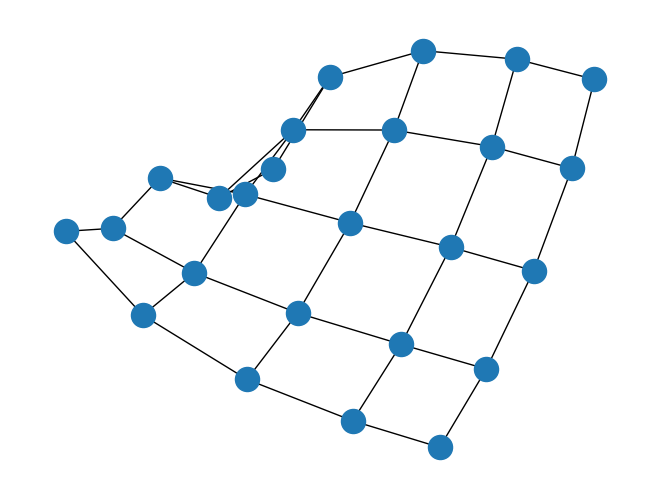

In [ ]:
import networkx as nx
from qc_grader.utilities.graph_util import display_maxcut_widget

graph = nx.Graph()
graph.add_nodes_from(np.arange(0,n*n,1))
for i in range(n):
    for j in range(n):
        v = n*i+j
        if j != n-1:
            graph.add_edge(v,v+1)
        if i != n-1:
            graph.add_edge(v,v+n)
        
nx.draw(graph, pos=nx.spring_layout(graph))    



# References
- de las Cuevas, G. (2013). A quantum information approach to statistical mechanics. Journal of Physics B: Atomic, Molecular and Optical Physics, 46.
- de las Cuevas, G., Dür, W., Van den Nest, M., & Martin-Delgado, M.A. (2011). Quantum algorithms for classical lattice models. New Journal of Physics, 13, 093021.
- Buhrman, H., Cleve, R., Watrous, J., & de Wolf, R. (2001). Quantum fingerprinting. Physical review letters, 87 16, 167902.